# Análise Exploratória e Pré-processamento dos Dados
## Table of Contents
* [Bibliotecas](#Bibliotecas-(Libraries))
* [Exploração e Pré-processamento dos Dados](#Exploração-e-Pré-processamento-dos-Dados)
* [Carga dos Dados](#-Carga-dos-Daods-Pré-processados-no-Disco)

## Bibliotecas (Libraries)

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exploração e Pré-processamento dos Dados
Lendo o training e o test set, e conferindo as suas dimensões.

In [405]:
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')
print(f'Train set shape: {train.shape}\nTest set shape: {test.shape}')

Train set shape: (891, 12)
Test set shape: (418, 11)


Lendo os 5 primeiros exemplos do training set.

In [407]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Explorando a feature `Sex` no training set.

In [409]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Visualizando a distribuição da feature `Age` no training set, excluíndo os valores nulos, caso haja.

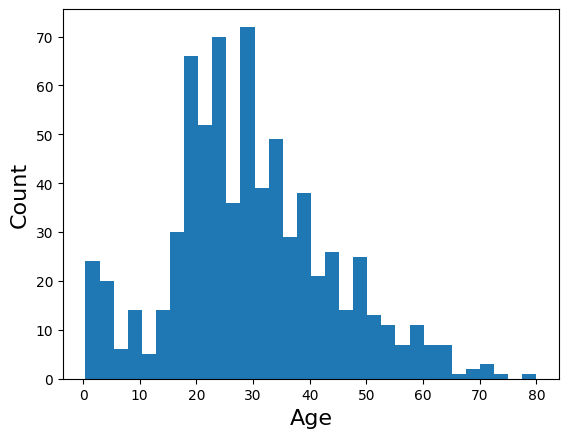

In [411]:
plt.hist(train['Age'].dropna(), bins=32)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.grid(False)
plt.show()

Visualizando a distribuição da feature `Age` entre as 2 classes da feature `Sex`, male e female, no training set, excluíndo os valores nulos, caso haja.

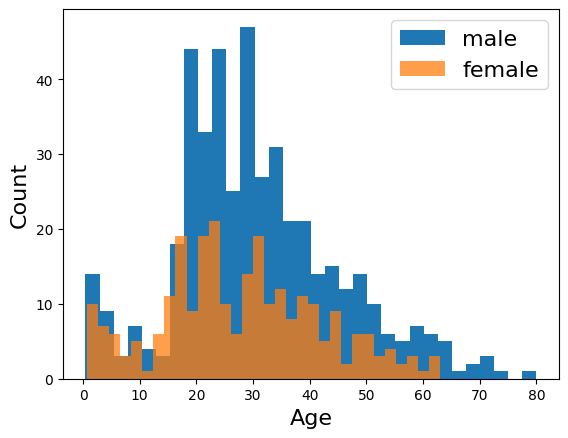

In [413]:
male_age = train[train['Sex'] == 'male']['Age'].dropna()
female_age = train[train['Sex'] == 'female']['Age'].dropna()

plt.hist(male_age.dropna(), bins=32, label='male')
plt.hist(female_age.dropna(), bins=32, label='female', alpha=.75)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.grid(False)
plt.show()

Quantidade de valores nulos no training set.

In [415]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

Os valores nulos das features `Cabin` e `Embarked` do training set, serão tratados no pré-processamento.

Tratando os valores nulos da feature `Fare` para o training e o test set.

In [417]:
train['Age_pre'] = train['Age'].fillna(int(train['Age'].mean()))
test['Age_pre'] = test['Age'].fillna(int(test['Age'].mean()))

Quantidade de valores nulos no test set.

In [419]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Sex              0
Name             0
Pclass           0
SibSp            0
Ticket           0
Parch            0
Embarked         0
Age_pre          0
dtype: int64

Os valores nulos da feature `Embarked` do test set serão tratados no pré-processamento.

Tratando os valores nulos da feature `Fare` do test set.

In [421]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

Explorando a feature `Embarked` no training set.

In [423]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Explorando a feature `Ticket` no training set.

In [425]:
train['Ticket'].value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

Explorando a feature `Name` no training set.

In [427]:
train['Name'].value_counts()

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

Fazendo a análise descritiva das features numéricas do training set.

In [429]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Age_pre,891.0,29.560236,13.005010,0.42,22.0000,29.0000,35.0,80.0000


Pré-processando as features do training set.

In [431]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'Q').astype(int)

train['Sex_b'] = train['Sex'].map(lambda x: 1 if x == 'female' else 0)

train['Cabin_null'] = train['Cabin'].isnull().astype(int)
train['Cabin_C'] = train['Cabin'].fillna('').str.count('C').astype(int)
train['Cabin_E'] = train['Cabin'].fillna('').str.count('E').astype(int)
train['Cabin_G'] = train['Cabin'].fillna('').str.count('G').astype(int)
train['Cabin_D'] = train['Cabin'].fillna('').str.count('D').astype(int)
train['Cabin_A'] = train['Cabin'].fillna('').str.count('A').astype(int)
train['Cabin_B'] = train['Cabin'].fillna('').str.count('B').astype(int)
train['Cabin_F'] = train['Cabin'].fillna('').str.count('F').astype(int)
train['Cabin_T'] = train['Cabin'].fillna('').str.count('T').astype(int)

train['Name_Miss'] = train['Name'].str.contains('Miss.').astype(int)
train['Name_Mrs'] = train['Name'].str.contains('Mrs.').astype(int)
train['Name_Master'] = train['Name'].str.contains('Master.').astype(int)
train['Name_Col'] = train['Name'].str.contains('Col.').astype(int)
train['Name_Major'] = train['Name'].str.contains('Major.').astype(int)
train['Name_Mr'] = train['Name'].str.contains('Mr.').astype(int)
train['Name_Dr'] = train['Name'].str.contains('Dr.').astype(int)
train['Name_Don'] = train['Name'].str.contains('Don.').astype(int)
train['Name_Sir'] = train['Name'].str.contains('Sir.').astype(int)

#train = pd.get_dummies(data=train, prefix=['Ticket_cat'], columns=['Ticket_cat'], dtype=int).drop(columns=['Ticket_cat_0'], axis=0)
train['Ticket_cat'] = train['Ticket'].map(lambda x: list(train['Ticket'].unique()).index(x) if x in list(train['Ticket'].unique()) else 0)
train['Ticket_num'] = train['Ticket'].str.split().map(lambda x: x[1] if len(x) > 1 and x[1].isnumeric() else x[0] if x[0].isnumeric() else 0)

Pré-processando as features do test set. Aplicamos as mesmas transformações realizadas no training set.

In [433]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'Q').astype(int)

test['Sex_b'] = test['Sex'].map(lambda x: 1 if x == 'female' else 0)

test['Cabin_null'] = test['Cabin'].isnull().astype(int)
test['Cabin_C'] = test['Cabin'].fillna('').str.count('C').astype(int)
test['Cabin_E'] = test['Cabin'].fillna('').str.count('E').astype(int)
test['Cabin_G'] = test['Cabin'].fillna('').str.count('G').astype(int)
test['Cabin_D'] = test['Cabin'].fillna('').str.count('D').astype(int)
test['Cabin_A'] = test['Cabin'].fillna('').str.count('A').astype(int)
test['Cabin_B'] = test['Cabin'].fillna('').str.count('B').astype(int)
test['Cabin_F'] = test['Cabin'].fillna('').str.count('F').astype(int)
test['Cabin_T'] = test['Cabin'].fillna('').str.count('T').astype(int)

test['Name_Miss'] = test['Name'].str.contains('Miss.').astype(int)
test['Name_Mrs'] = test['Name'].str.contains('Mrs.').astype(int)
test['Name_Master'] = test['Name'].str.contains('Master.').astype(int)
test['Name_Col'] = test['Name'].str.contains('Col.').astype(int)
test['Name_Major'] = test['Name'].str.contains('Major.').astype(int)
test['Name_Mr'] = test['Name'].str.contains('Mr.').astype(int)
test['Name_Dr'] = test['Name'].str.contains('Dr.').astype(int)
test['Name_Don'] = test['Name'].str.contains('Don.').astype(int)
test['Name_Sir'] = test['Name'].str.contains('Sir.').astype(int)

#test = pd.get_dummies(data=test, prefix=['Ticket_cat'], columns=['Ticket_cat'], dtype=int).drop(columns=['Ticket_cat_0'], axis=0)
test['Ticket_cat'] = test['Ticket'].map(lambda x: list(test['Ticket'].unique()).index(x) if x in list(test['Ticket'].unique()) else 0)
test['Ticket_num'] = test['Ticket'].str.split().map(lambda x: x[1] if len(x) > 1 and x[1].isnumeric() else x[0] if x[0].isnumeric() else 0)

Selecionando apenas as features que serão usadas para a criação do modelo.

In [435]:
variaveis = ['Sex_b', 'Age_pre', 'Pclass', 'Embarked_S', 'Embarked_C', 'SibSp', 'Parch', 'Fare', 'Cabin_null',
             'Cabin_C', 'Cabin_E', 'Cabin_G', 'Cabin_D', 'Cabin_A', 'Cabin_B', 'Cabin_F', 'Cabin_T',
             'Name_Miss', 'Name_Mrs', 'Name_Master', 'Name_Col', 'Name_Major', 'Name_Mr', 'Name_Dr', 'Name_Don',
             'Name_Sir', 'Ticket_num', 'Ticket_cat']

Separando as features pré-processadas de cada dataset.

In [437]:
X = train[variaveis + ['Survived']].copy()
X_test = test[variaveis].copy()

Lendo os 5 primeiros exemplos do training set.

In [439]:
X.head()

,Sex_b,Age_pre,Pclass,Embarked_S,Embarked_C,SibSp,Parch,Fare,Cabin_null,Cabin_C,...,Name_Master,Name_Col,Name_Major,Name_Mr,Name_Dr,Name_Don,Name_Sir,Ticket_num,Ticket_cat,Survived
0,0,22.0,3,1,0,1,0,7.2500,1,0,...,0,0,0,1,0,0,0,21171,0,0
1,1,38.0,1,0,0,1,0,71.2833,0,1,...,0,0,0,1,0,0,0,17599,1,1
2,1,26.0,3,1,0,0,0,7.9250,1,0,...,0,0,0,0,0,0,0,3101282,2,1
3,1,35.0,1,1,0,1,0,53.1000,0,1,...,0,0,0,1,0,0,0,113803,3,1
4,0,35.0,3,1,0,0,0,8.0500,1,0,...,0,0,0,1,0,0,0,373450,4,0


## Carga dos Dados Pré-processados no Disco
Carregando os dados pré-processados no disco para a criação do modelo.

In [441]:
X.to_csv('../data/preprocessed/train.csv', index=False)
X_test.to_csv('../data/preprocessed/test.csv', index=False)